<a href="https://colab.research.google.com/github/RVillanueva117/Data-Science-II/blob/main/DSII_Primera_Preentrega_Rodrigo_Villanueva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSII - Primera Preentrega**
USA Housing Dataset

Fuente: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

Autor: Rodrigo Villanueva



El análisis de datos de precios de viviendas busca comprender los factores estructurales y cualitativos que influyen en el valor de los inmuebles a partir de un conjunto de variables como superficie habitable, número de baños, dormitorios, año de construcción, vista y estado general de la vivienda.
El objetivo principal radica en identificar qué características impactan de forma significativa en el precio, permitiendo construir modelos predictivos más precisos y entender la dinámica del mercado inmobiliario.

A través de técnicas estadísticas, visualizaciones y regresión lineal, este estudio demuestra que variables como la superficie habitable (sqft_living), la cantidad de baños (bathrooms) y la vista (view), por ejemplo,  presentan una correlación positiva y relevante con el precio, mientras que otras como el estado general (condition) y el año de construcción (yr_built) ejercen una influencia mucho menor.

El propósito final es transformar la información bruta en conocimiento útil para la toma de decisiones estratégicas.

Este análisis está orientado a Empresas del sector inmobiliario y desarrolladores urbanos, interesados en identificar los atributos de mayor impacto económico para optimizar proyectos y estrategias de precios, como así también a Inversores y agentes inmobiliarios, que requieren información objetiva para evaluar oportunidades de compra y venta según las características del inmueble.

Saving USA Housing Dataset.csv to USA Housing Dataset.csv
Shape: (4140, 18)

Tipos de datos:
 date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Valores nulos:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Estadísticas descriptivas:
                 count unique             

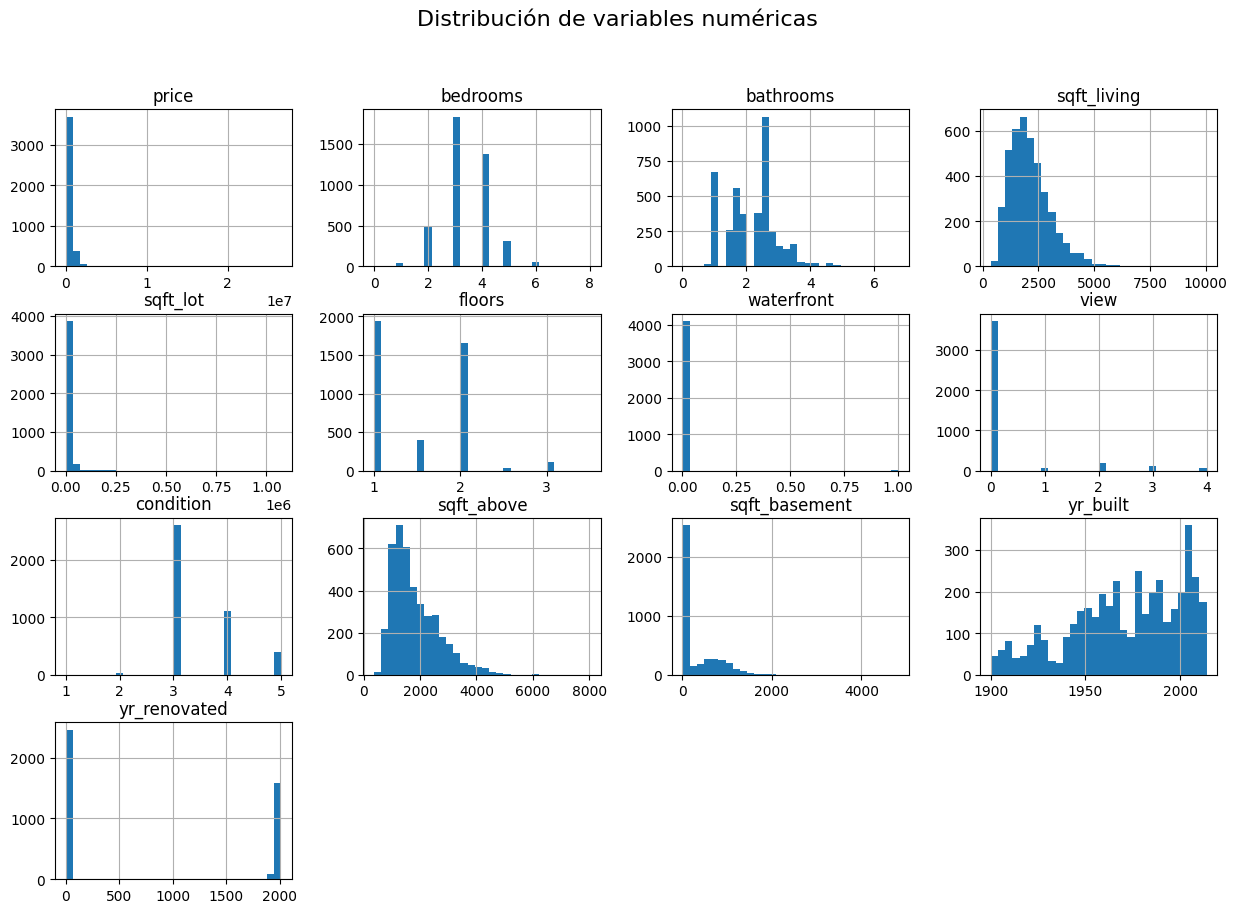

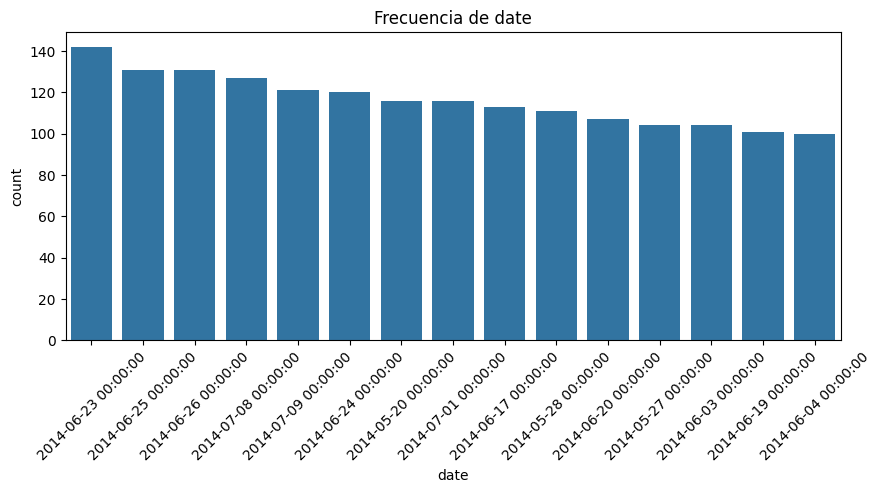

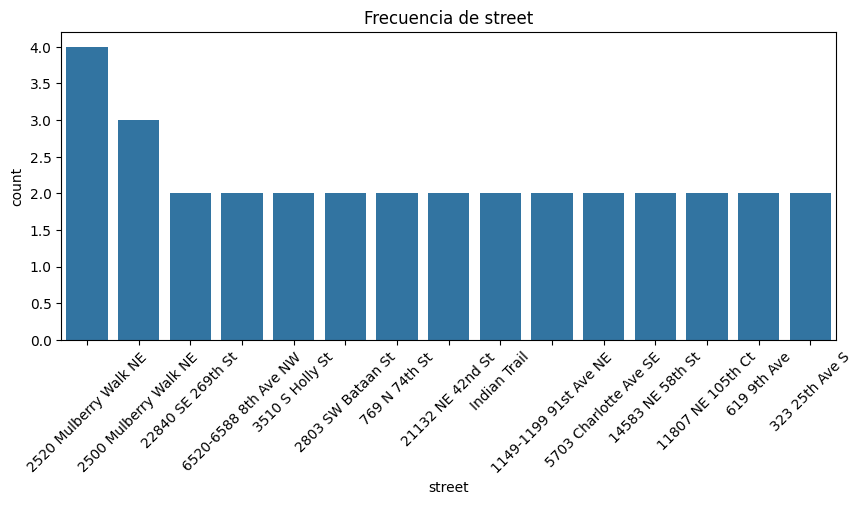

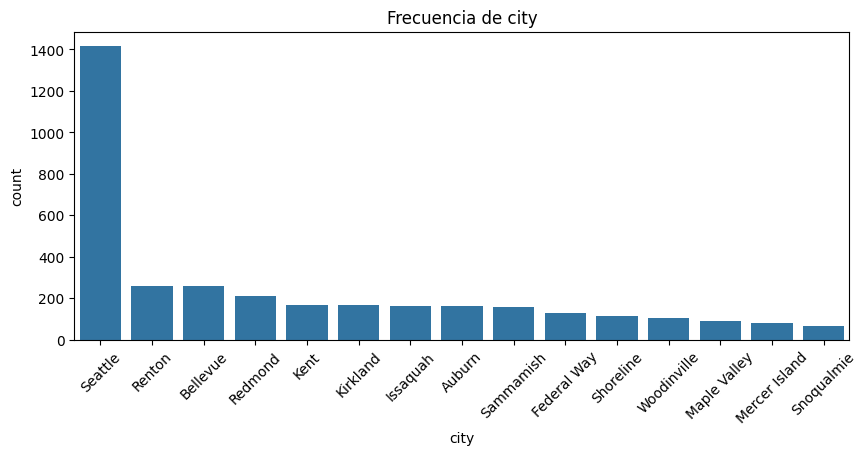

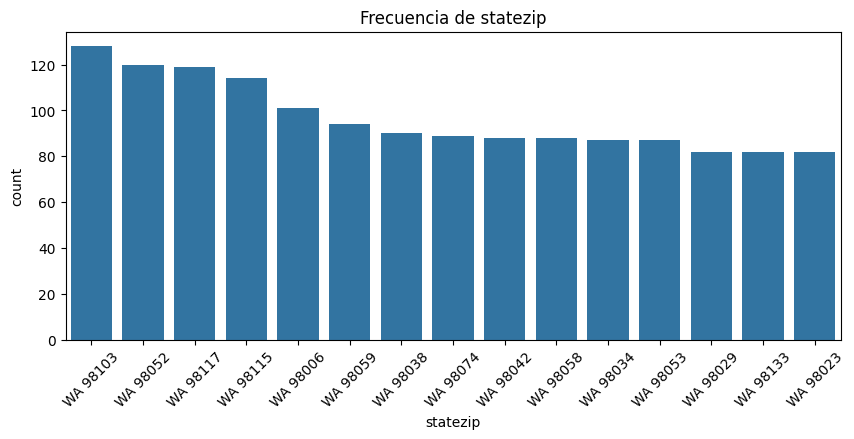

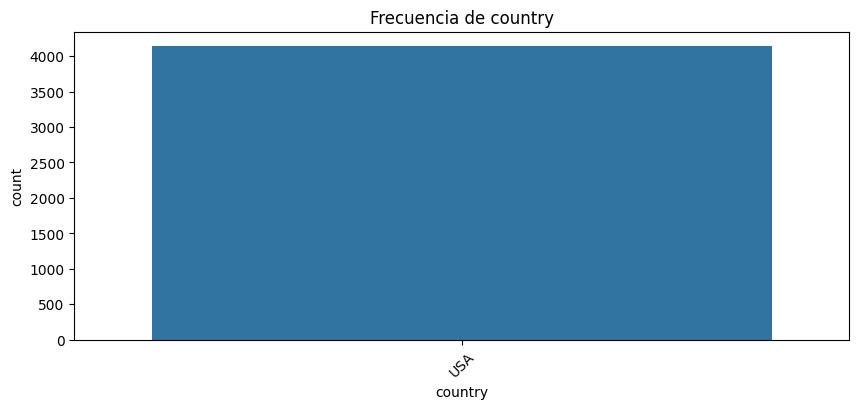

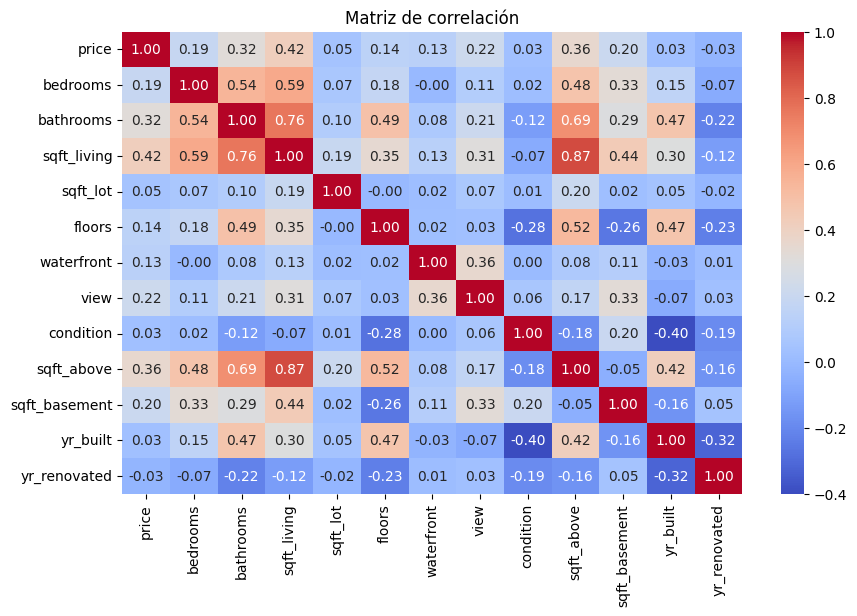

In [2]:
# ========================================================
# ANÁLISIS EXPLORATORIO DE DATOS PARA USA Housing Dataset
# ========================================================

# 1) Importar Librerías:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 2) Subir archivo USA Housing Dataset:
uploaded = files.upload()

# 3) Leer el archivo
df = pd.read_csv("USA Housing Dataset.csv")

# 4) Info general
print("Shape:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

# 5) Estadísticas básicas
print("\nEstadísticas descriptivas:\n", df.describe(include="all").transpose())

# 6) Histogramas para numéricas
num_cols = df.select_dtypes(include=["int64","float64"]).columns
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

# 7) Barplots para categóricas (primeras 5 columnas)
cat_cols = df.select_dtypes(include=["object"]).columns[:5]
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:15])
    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=45)
    plt.show()

# 8) Heatmap de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


# **¿Qué factores influyen más en el precio de las propiedades en EEUU?**

¿Las propiedades con más años de antigüedad de construcción (yr_built) siempre tienen un precio más bajo?
Hipótesis: A mayor antigüedad, menor precio.

¿Las propiedades con mayor superficie habitable (sqft_living) resultan más costosas?
Hipótesis: Mayor superficie habitable = precios más altos

¿La cantidad de habitaciones (bedrooms) incrementa significativamente el precio?
Hipótesis: Más habitaciones = precios más altos.

¿La cantidad de baños (bathrooms) incrementa significativamente el precio?
Hipótesis: Más baños = precios más altos.

¿Hay diferencias en precio por la vista (view) que posee la propiedad?
Hipótesis: Los propiedades con mejor vista suelen ser más caras.

¿Qué impacto tienen las condiciones generales de la vivienda (conditions) respecto del precio?
Hipótesis: Mejores condiciones = mayor precio.


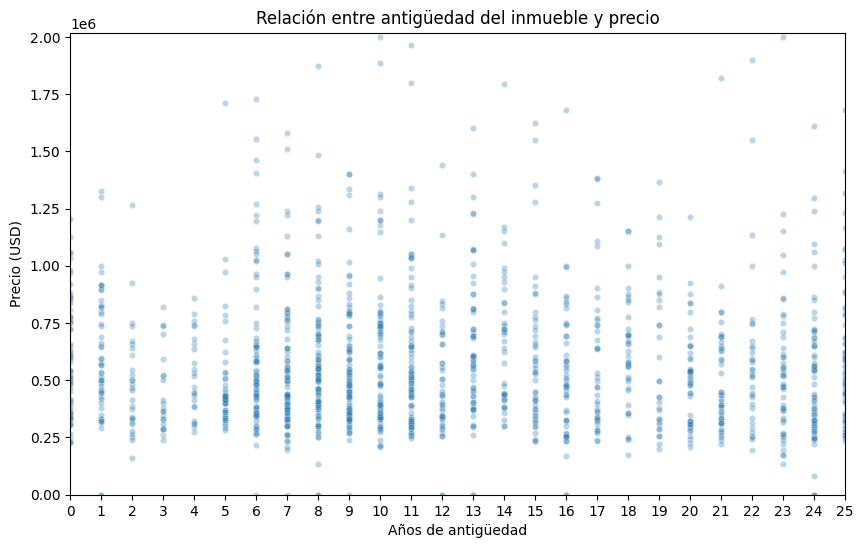

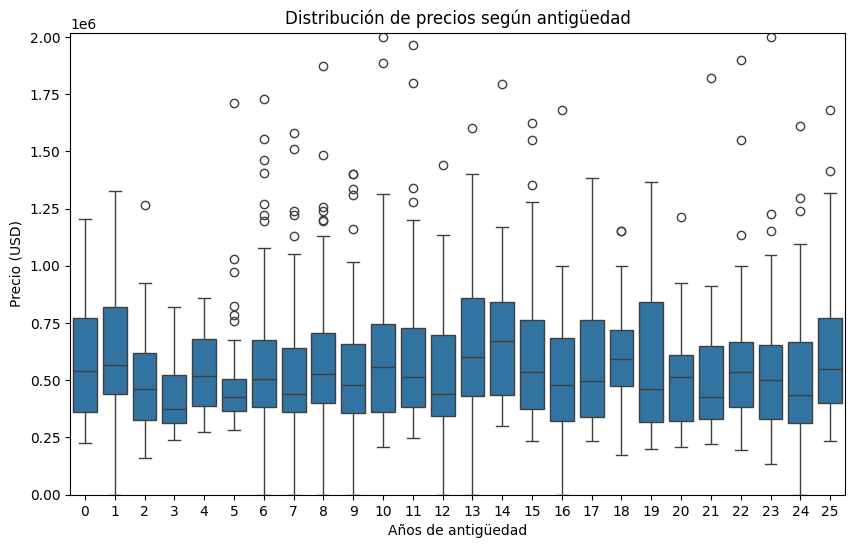

 Correlación age vs price: -0.03


In [27]:
# ¿Las propiedades con más años de antigüedad de construcción (yr_built) siempre tienen un precio más bajo?

df = pd.read_csv("USA Housing Dataset.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular antigüedad (tomando como referencia el año más nuevo del dataset)
ref_year = df["yr_built"].max()
df["age"] = ref_year - df["yr_built"]

# Eliminar outliers extremos:
q99 = df["price"].quantile(0.99)

# Scatterplot: antigüedad vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="price", alpha=0.3, s=20)
plt.title("Relación entre antigüedad del inmueble y precio")
plt.xlabel("Años de antigüedad")
plt.ylabel("Precio (USD)")
plt.xlim(0, 25)
plt.ylim(0, q99)
plt.xticks(np.arange(0, 26, 1))
plt.show()

# Boxplot: antigüedad vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="age", y="price")
plt.title("Distribución de precios según antigüedad")
plt.xlabel("Años de antigüedad")
plt.ylabel("Precio (USD)")
plt.xlim(-0.5, 25.5)
plt.ylim(0, q99)
plt.xticks(np.arange(0, 26, 1), rotation=0)
plt.show()

# Correlación entre antigüedad y precio
corr = df["age"].corr(df["price"])
print(f" Correlación age vs price: {corr:.2f}")

# **Evidencia de los gráficos**

Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al impacto de la antigüedad de las propiedades respecto del precio de las mismas del presente dataset, la antigüedad del inmueble apenas influye en el precio. Puede haber una tendencia leve a que las propiedades más nuevas valgan un poco más, pero no es un patrón fuerte ni consistente.


# **Insights**

La hipótesis no se cumple de manera significativa en este dataset. El valor –0.03 indica una relación negativa muy débil, casi nula. Aunque parece lógico pensar que las propiedades más viejas deberían valer menos,
en este conjunto de datos esa tendencia no se observa de manera clara.
El precio parece depender mucho más de otras variables (como superficie, ubicación, número de habitaciones, vista, condición, etc.) que de la antigüedad.

# 🔵 Evidentemente la antigüedad de las propiedades no necesariamente impacta en el precio de las mismas. Al menos, no resulta un factor determinante para establecer el precio, el cual estaría más relacionado a otras variables.

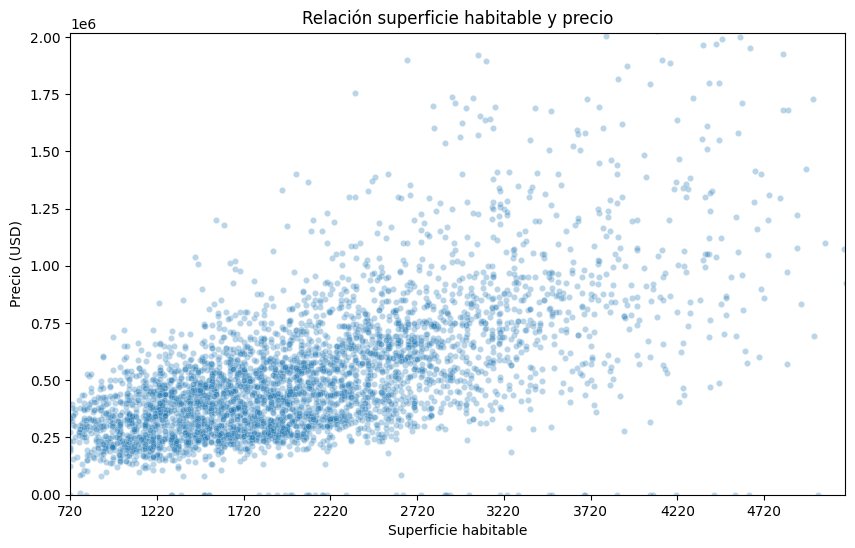

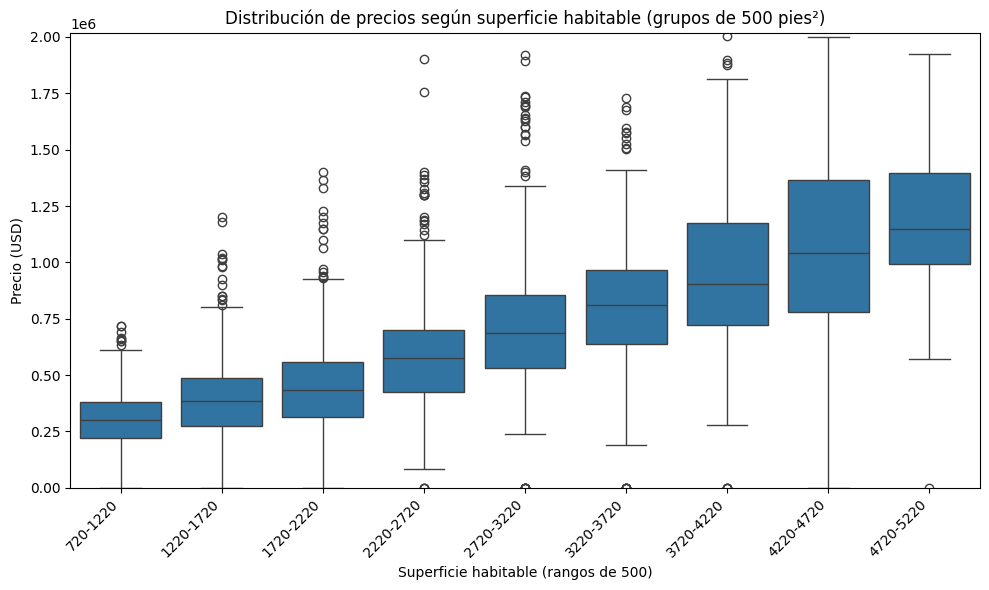

 Correlación sqft_living vs price: 0.42


In [26]:
#¿Las propiedades con mayor superficie habitable (sqft_living) resultan más costosas?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular percentiles para definir límites que den lugar a una visualización que permita obtener insights
q_low = df["sqft_living"].quantile(0.01)
q_high = df["sqft_living"].quantile(0.99)
q99_price = df["price"].quantile(0.99)

# Scaterplot: superficie habitable vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="sqft_living", y="price", alpha=0.3, s=20)
plt.title("Relación superficie habitable y precio")
plt.xlabel("Superficie habitable")
plt.ylabel("Precio (USD)")
plt.xlim(q_low, q_high)
plt.ylim(0, q99_price)
plt.xticks(np.arange(int(q_low), int(q_high)+1, 500))
plt.show()


# Crear una columna auxiliar con bins correspondientes a rangos de tamaño
bins = np.arange(int(q_low), int(q_high) + 500, 500)
labels = [f"{int(b)}-{int(b+500)}" for b in bins[:-1]]
df["sqft_group"] = pd.cut(df["sqft_living"], bins=bins, labels=labels, include_lowest=True)

# Filtrar valores dentro del rango definido
df_box = df[(df["sqft_living"] >= q_low) & (df["sqft_living"] <= q_high) & (df["price"] <= q99_price)]

# Boxplot: superficie habitable vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df_box, x="sqft_group", y="price")

plt.title("Distribución de precios según superficie habitable (grupos de 500 pies²)")
plt.xlabel("Superficie habitable (rangos de 500)")
plt.ylabel("Precio (USD)")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, q99_price)
plt.tight_layout()
plt.show()

# Correlación entre superficie habitable y precio
corr = df["sqft_living"].corr(df["price"])
print(f" Correlación sqft_living vs price: {corr:.2f}")

# **Evidencia de los gráficos**

Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al impacto de la superficie habitable respecto del precio de las mismas, se puede observar que a medida que aumenta la superficie habitable (sqft_living), tiende a aumentar el precio (price). Esto queda evidenciado también con el coeficiente 0.42 indica una correlación positiva moderada


# **Insights**

En este caso si se cumple la hipótesis, lo que significa que existe una relación directa clara entre ambas variables.
En promedio, las propiedades con mayor superficie habitable tienden a tener precios más altos.

# 🔵 Queda demostrado que la correlación entre la superficie habitable y el precio resulta una relación positiva moderada, confirmando que los inmuebles con mayor superficie habitable tienden a presentar precios más elevados.

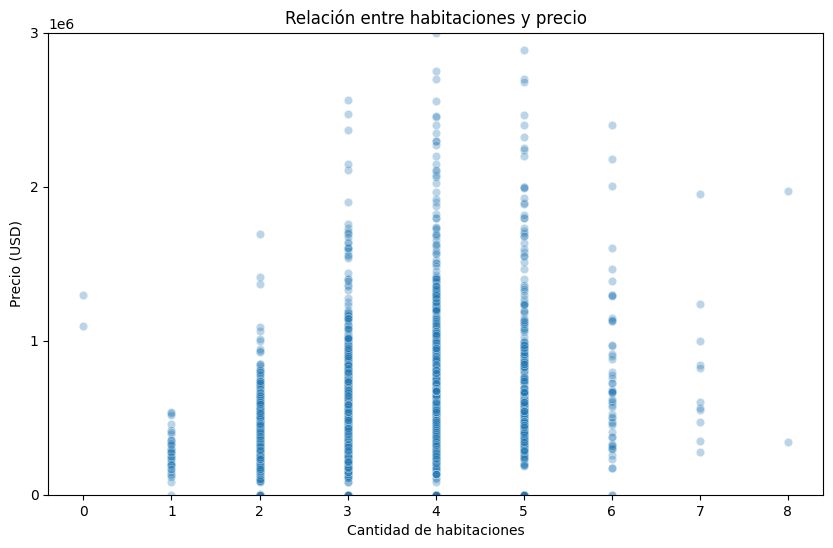

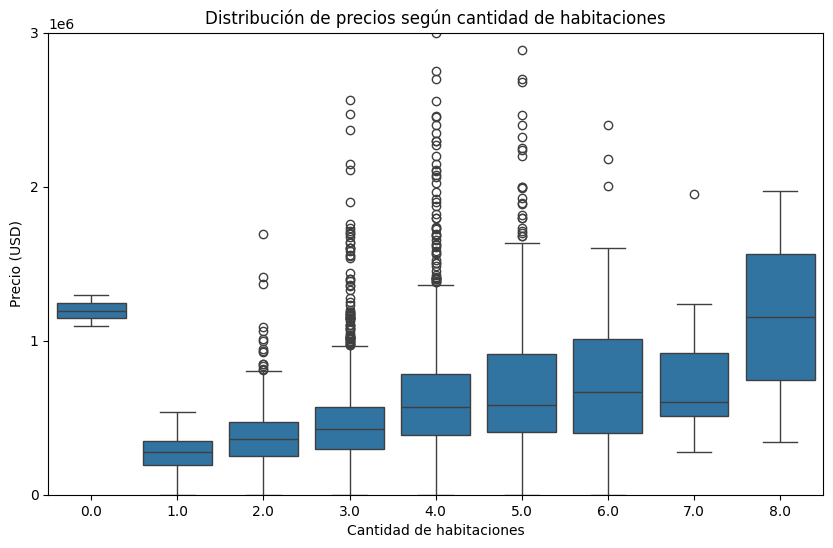

 Correlación bedrooms vs price: 0.19


In [25]:
# ¿La cantidad de habitaciones (bedrooms) incrementa significativamente el precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular límite superior que de lugar a una visualización que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: habitaciones vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="bedrooms", y="price", alpha=0.3)
plt.title("Relación entre habitaciones y precio")
plt.xlabel("Cantidad de habitaciones")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: habitaciones vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bedrooms", y="price")
plt.title("Distribución de precios según cantidad de habitaciones")
plt.xlabel("Cantidad de habitaciones")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlación entre habitaciones y precio
corr = df["bedrooms"].corr(df["price"])
print(f" Correlación bedrooms vs price: {corr:.2f}")

# **Evidencia de los gráficos**
Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al impacto de la cantidad de habitaciones respecto del precio de las propiedades, se observa que en promedio, a mayor cantidad de habitaciones, mayor precio, no obstante, no se trata de una relación fuerte ni consistente.

# **Insights**
Si bien se cumple la hipótesis, aunque los inmuebles con más habitaciones tienden a costar más, la cantidad de dormitorios no explica gran parte de la variabilidad del precio.

# 🔵  Si bien los inmuebles con más habitaciones tienden a presentar precios más altos, la cantidad de dormitorios por sí sola no es un predictor sólido del valor de la propiedad.

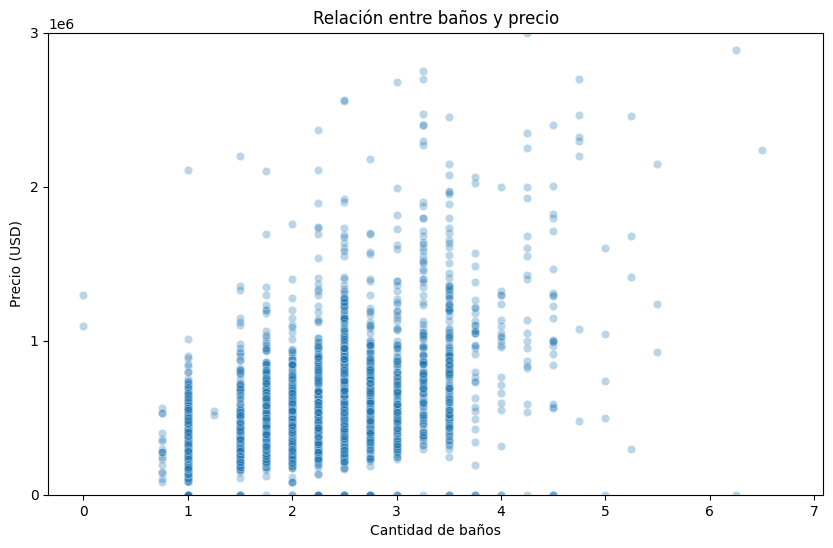

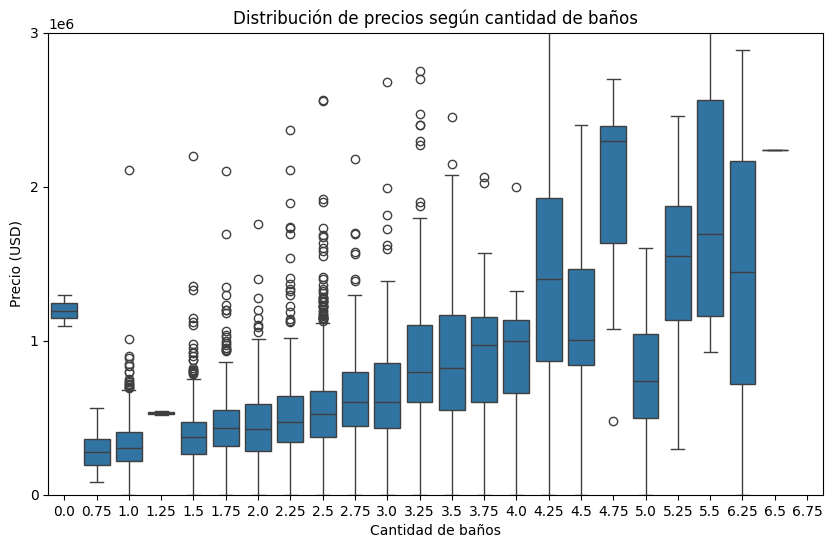

 Correlación bathrooms vs price: 0.32


In [24]:
# ¿La cantidad de baños (bathrooms) incrementa significativamente el precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular límite superior que de lugar a una visualización que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: baños vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="bathrooms", y="price", alpha=0.3)
plt.title("Relación entre baños y precio")
plt.xlabel("Cantidad de baños")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: baños vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="bathrooms", y="price")
plt.title("Distribución de precios según cantidad de baños")
plt.xlabel("Cantidad de baños")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlación entre baños y precio
corr = df["bathrooms"].corr(df["price"])
print(f" Correlación bathrooms vs price: {corr:.2f}")

# **Evidencia de los gráficos**
Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al impacto de la cantidad de baños respecto del precio de las propiedades, se puede interpretar que medida que aumenta el número de baños, el precio del inmueble crece de forma consistente.



# **Insights**
Se cumple la hipótesis, las propiedades con más baños tienden a tener precios más altos. Este patrón es más fuerte que el de la cantidad de habitaciones, lo que sugiere que la comodidad (más baños por habitante) influye más en el valor que el número de dormitorios, se puede asumir también que más baños estén asociados a mayor superficie habitable, reforzando la relación entre cantidad de baños y precio.

# 🔵 Las propiedades con más baños tienden a presentar precios más altos, reflejando el valor agregado de la comodidad y el tamaño de la vivienda.

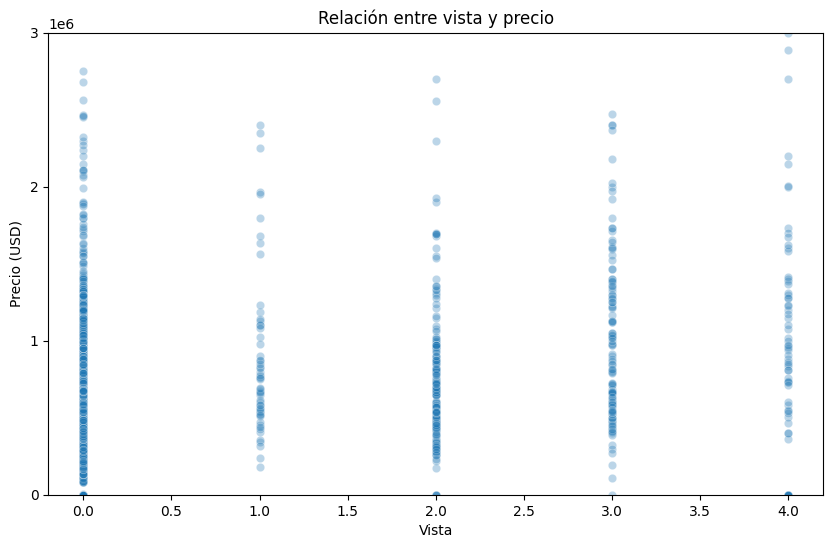

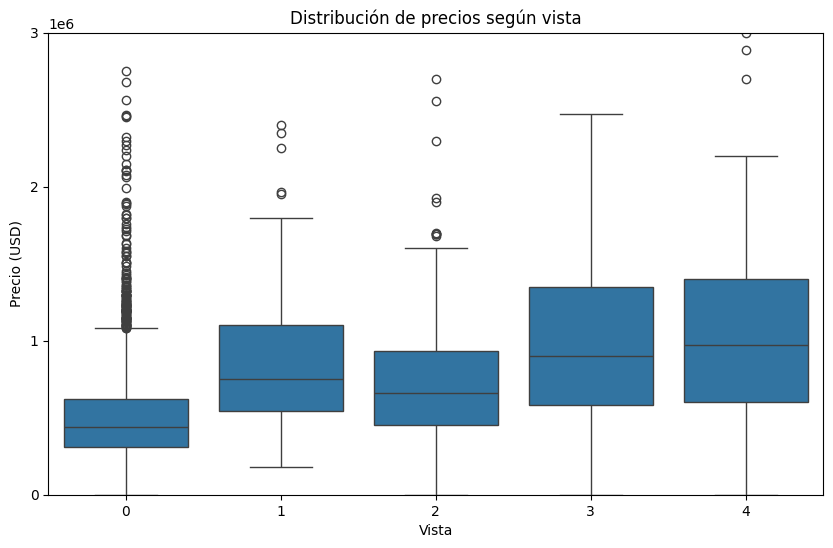

 Correlación view vs price: 0.22


In [22]:
# ¿Hay diferencias en precio por la vista (view) que posee la propiedad?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular límite superior que de lugar a una visualización que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: vista vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="view", y="price", alpha=0.3)
plt.title("Relación entre vista y precio")
plt.xlabel("Vista")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: vista vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="view", y="price")
plt.title("Distribución de precios según vista")
plt.xlabel("Vista")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlación entre vista y precio
corr = df["view"].corr(df["price"])
print(f" Correlación view vs price: {corr:.2f}")

# **Evidencia de los gráficos**
Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al impacto de la vista de la propiedad respecto del precio, se oobserva que a medida que mejora la vista, el precio tiende a aumentar

# **Insights**
Si bien se cumple con la hipótesis, las propiedades con mejor vista suelen valer más, pero la vista por sí sola no explica una gran parte del precio

# 🔵 Las propiedades con mejores vistas tienden a alcanzar precios más elevados, aunque este efecto no es dominante frente a otras variables estructurales como superficie o número de baños.

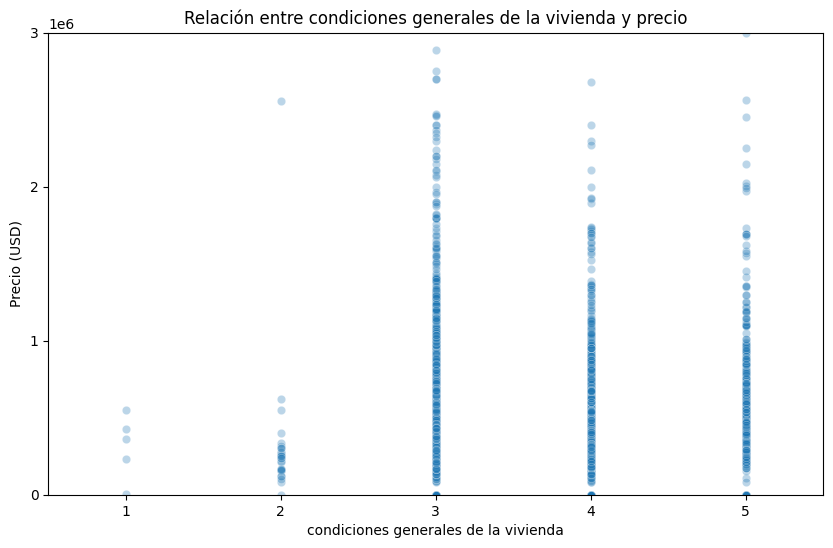

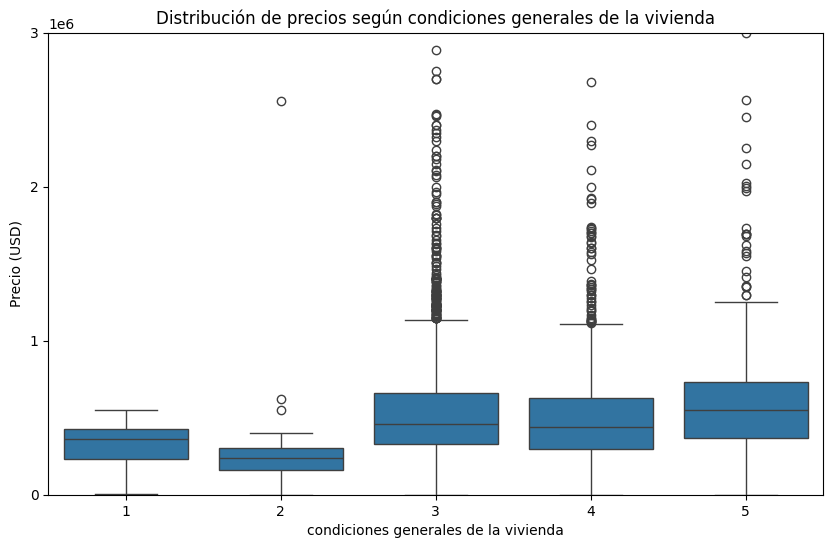

 Correlación condition vs price: 0.03


In [23]:
# ¿Qué impacto tienen las condiciones generales de la vivienda (condition) respecto del precio?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular límite superior que de lugar a una visualización que permita obtener insights
q99_price = df["price"].quantile(0.99)

# Scatterplot: condiciones generales de la vivienda vs precio
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="condition", y="price", alpha=0.3)
plt.title("Relación entre condiciones generales de la vivienda y precio")
plt.xlabel("condiciones generales de la vivienda")
plt.ylabel("Precio (USD)")
plt.xlim(0.5, 5.5)
plt.xticks(np.arange(1, 6, 1))
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Boxplot: condiciones generales de la vivienda vs precio
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="condition", y="price")
plt.title("Distribución de precios según condiciones generales de la vivienda")
plt.xlabel("condiciones generales de la vivienda")
plt.ylabel("Precio (USD)")
plt.ylim(0, q99_price)
plt.yticks(np.arange(0, q99_price + 1_000_000, 1_000_000))
plt.show()

# Correlación entre condiciones generales de la vivienda y precio
corr = df["condition"].corr(df["price"])
print(f" Correlación condition vs price: {corr:.2f}")

# **Evidencia de los gráficos**
Al visualizar los gráficos obtenidos (Scatterplot y Boxplot) en relación al entre las condiciones generales de la vivienda y el precio, se observa que la variable condition no impacta fuertemente en el precio.

# **Insights**
No se cumple la hi´+otesis, aunque parecería lógico pensar que una casa en mejor estado debería valer más que una en mal estado, en este dataset esa tendencia no se refleja claramente.

# 🔵 El estado general de la vivienda no explica las variaciones de precio de forma significativa.

# **MODELO**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Selección de variables
features = ["yr_built", "sqft_living", "bedrooms", "bathrooms", "view", "condition"]
X = df[features]
y = df["price"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📌 RMSE:", rmse)
print("📌 R²:", r2)

# Coeficientes
coef = pd.DataFrame({"Variable": features, "Coeficiente": model.coef_})
print("\nCoeficientes del modelo:")
print(coef)



📌 RMSE: 254800.8944017073
📌 R²: 0.3807104481457786

Coeficientes del modelo:
      Variable   Coeficiente
0     yr_built  -2079.029171
1  sqft_living    272.459881
2     bedrooms -69861.233027
3    bathrooms  66227.156334
4         view  49602.542317
5    condition  18853.481348


RMSE ≈ 254 800 USD → El modelo tiene un error promedio de ±254 800 USD en la predicción del precio

R² ≈ 0.38 → El modelo explica el 38 % de la variabilidad del precio. Es un nivel moderado, todavía un 62 % de la variación queda sin explicar

# 📌 Coeficientes (interpretación)

yr_built = –2 079

Cada año más nuevo aumenta el precio en ~2 079 USD, implica que las propiedades más antiguas valen menos.

sqft_living = +272

Por cada pie cuadrado adicional de superficie habitable, el precio aumenta en promedio 272 USD. Es el predictor más influyente.


bedrooms = –69 861

A igualdad de superficie, más dormitorios se asocian con precios algo menores. Se puede interpretar que más habitaciones en la misma superficie implican ambientes más pequeños o menor lujo.

bathrooms = +66 227

Cada baño adicional se asocia con un aumento promedio de 66 227 USD en el precio, reflejando el valor agregado del confort y suponiendo una mayor superficie habitable.

view = +49 602

Las propiedades con mejor vista tienden a valer unos 49 600 USD más.

condition = +18 853

Mejorar la condición del inmueble (por ejemplo, de 3 a 4) se asocia con un incremento medio de ~18 800 USD. Su efecto es positivo, aunque menor que el de baños o vista.



# 🔑 Insights

La superficie (sqft_living) es el factor más determinante del precio.
Su efecto positivo y alto confirma que el tamaño del inmueble es la principal variable estructural que explica el valor.

Los baños también tienen un fuerte peso.
Incrementar la cantidad de baños genera un aumento considerable del precio, más que el número de habitaciones.

El número de dormitorios puede tener un efecto inverso.
Esto ocurre cuando las casas con más habitaciones no necesariamente son más grandes, sino que distribuyen peor el espacio.

La vista (view) supone un incremento en el precio, aunque su correlación no es muy elevada (0.22)

El estado (condition) y el año de construcción (yr_built) también influyen, pero en menor grado.

El modelo explica el 38 % de la variación del precio, lo cual sugiere que falta considerar otras variables que tal vez resulten relevantes para el precio de la vivienda

